In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('price predict.csv') 

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  Exploratory Data Analysis

In [4]:
df.shape

(1460, 80)

In [5]:
df_n = df.select_dtypes([int,float])
df_o = df.select_dtypes(object)

In [6]:
print("total_numerical_columns",len(df_n.columns))
print("total_object_columns",len(df_o.columns))

total_numerical_columns 37
total_object_columns 43


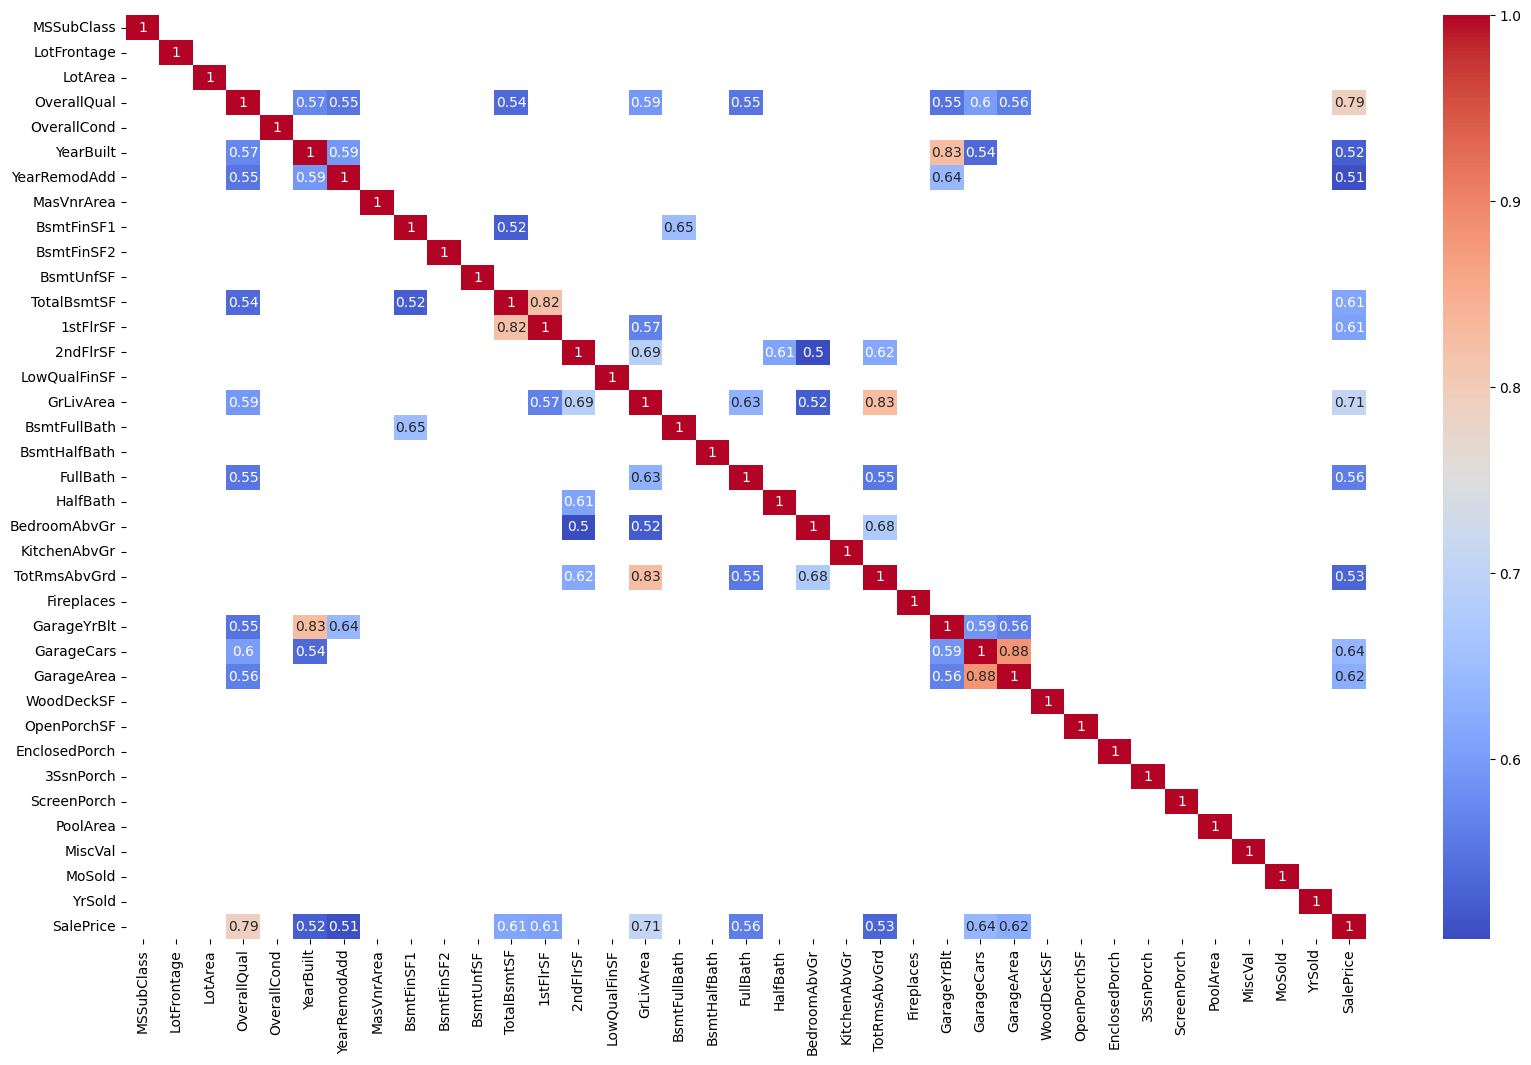

In [7]:
plt.figure(figsize=(20,12))
df_ncorr = df_n.corr()[df_n.corr()>0.5]
sns.heatmap(df_ncorr,cmap = "coolwarm",annot=True)
plt.show()

### SalePrice


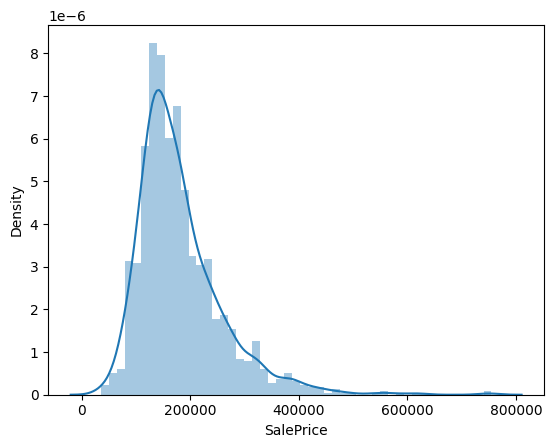

In [8]:
sns.distplot(df['SalePrice'])
plt.show()

In [9]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [10]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [11]:
df["Alley"] = df["Alley"].fillna("None")

In [12]:
df["Fence"] = df["Fence"].fillna("None")

In [13]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [14]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [15]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[i] = df[i].fillna('None')

In [16]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[i] = df[i].fillna(0)

In [17]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[i] = df[i].fillna('None')

In [18]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [19]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])


In [20]:
df["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [21]:
df = df.drop(['Utilities'], axis=1)


In [22]:
df["Functional"] = df["Functional"].fillna("Typ")

In [23]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [24]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [25]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [26]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [27]:
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [28]:
categorical_var = df.dtypes[df.dtypes == "object"]

Transforming some numerical variables that are really categorical

In [29]:
df['OverallCond'].dtype

dtype('int64')

In [30]:
#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

In [31]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [32]:
#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information in their ordering set

In [33]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [35]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder() 
    label_ec.fit(list(df[c].values)) 
    df[c] = label_ec.transform(list(df[c].values))


In [36]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,0,3,4,None,0,4,2,WD,Normal,208500
1,4,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,0,3,4,None,0,7,1,WD,Normal,181500
2,9,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,0,3,4,None,0,11,2,WD,Normal,223500
3,10,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,0,3,4,None,0,4,0,WD,Abnorml,140000
4,9,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,0,3,4,None,0,3,2,WD,Normal,250000


In [37]:
df = pd.get_dummies(df, drop_first=False)
print(df.shape)

(1460, 221)


In [38]:
df

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,65.0,8450,1,1,3,0,7,4,2003,...,False,False,False,True,False,False,False,False,True,False
1,4,80.0,9600,1,1,3,0,6,7,1976,...,False,False,False,True,False,False,False,False,True,False
2,9,68.0,11250,1,1,0,0,7,4,2001,...,False,False,False,True,False,False,False,False,True,False
3,10,60.0,9550,1,1,0,0,7,4,1915,...,False,False,False,True,True,False,False,False,False,False
4,9,84.0,14260,1,1,0,0,8,4,2000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,62.0,7917,1,1,3,0,6,4,1999,...,False,False,False,True,False,False,False,False,True,False
1456,4,85.0,13175,1,1,3,0,6,5,1978,...,False,False,False,True,False,False,False,False,True,False
1457,10,66.0,9042,1,1,3,0,7,8,1941,...,False,False,False,True,False,False,False,False,True,False
1458,4,68.0,9717,1,1,3,0,5,5,1950,...,False,False,False,True,False,False,False,False,True,False


In [39]:
X = df.drop('SalePrice',axis=1)  
y=df["SalePrice"]

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [42]:
pd.DataFrame(x_sc, columns=X.columns).head()


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.786430,-0.231877,-0.207142,0.064238,0.024699,0.750731,-0.225716,0.651479,-0.517200,1.050994,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.625160,0.437043,-0.091886,0.064238,0.024699,0.750731,-0.225716,-0.071836,2.179628,0.156734,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.786430,-0.098093,0.073480,0.064238,0.024699,-1.378933,-0.225716,0.651479,-0.517200,0.984752,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,1.068748,-0.454850,-0.096897,0.064238,0.024699,-1.378933,-0.225716,0.651479,-0.517200,-1.863632,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.786430,0.615421,0.375148,0.064238,0.024699,-1.378933,-0.225716,1.374795,-0.517200,0.951632,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [43]:
pca = PCA()

In [44]:
pd.DataFrame(pca.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,-2065.081725,52.180231,272.502069,-749.391337,-166.938125,98.266077,-182.278086,-4.932213,58.187995,10.742944,...,9.726699e-14,9.172923e-14,-7.719220e-14,3.833152e-13,-2.422582e-13,-7.019691e-14,-2.108584e-13,-1.921789e-12,-2.230391e-13,-3.519014e-12
1,-911.698682,21.475842,-749.077298,-225.325093,-46.804912,42.906963,-78.874533,12.791622,-124.490733,24.519893,...,-2.105347e-12,-1.667912e-12,1.887438e-12,3.071350e-12,-1.326132e-12,-3.161173e-12,6.456144e-13,-2.587483e-12,-2.026791e-12,-5.893704e-13
2,734.600686,113.411840,463.366226,-427.194912,-127.813038,121.252065,-169.340729,-3.941705,46.673718,65.341376,...,-7.055218e-13,-4.845569e-13,1.561800e-12,6.137545e-13,-1.385323e-12,1.200523e-12,8.805978e-13,2.083327e-12,1.778558e-12,-1.488386e-13
3,-970.395508,-25.770928,570.744930,-201.357168,-99.479931,186.933504,18.393685,-44.432606,-61.369822,159.457013,...,-1.688925e-12,7.668288e-13,-1.031278e-13,1.630261e-12,1.297205e-12,-7.923386e-13,1.058408e-12,2.338910e-12,6.088780e-12,-5.899345e-13
4,3758.397594,652.603924,538.592136,-541.875093,-135.426792,20.717977,-174.851298,-63.170562,214.534884,161.051898,...,9.653771e-13,-6.615735e-13,-1.830628e-12,-2.315387e-12,-7.097242e-13,-2.059682e-12,1.907134e-12,3.702771e-13,-9.528900e-13,9.600591e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-2604.666172,64.493625,643.230027,265.019373,-21.678335,179.801879,-112.309823,61.301145,-100.799117,11.740684,...,1.251364e-13,1.074581e-13,-1.018868e-13,4.075874e-13,-3.393416e-13,-1.953131e-13,-1.087967e-13,2.857187e-14,1.745961e-13,6.889891e-14
1456,2685.092512,941.466073,-552.354746,99.776953,24.563231,-167.080864,513.997935,-51.224782,-93.146130,-88.256988,...,-6.803406e-13,-7.177928e-13,1.688744e-13,9.056260e-14,6.929796e-13,-8.387171e-13,-1.326670e-14,-4.177292e-13,-4.628930e-13,2.268444e-14
1457,-1457.848598,632.978372,1015.745322,-525.438942,2401.431540,-91.253162,-50.385459,123.585158,-264.893061,-205.601404,...,8.558936e-13,-2.491120e-13,-3.622627e-14,5.560043e-13,-2.973533e-13,-5.072775e-13,2.710393e-13,-4.521961e-14,2.966935e-13,1.365366e-13
1458,-809.624818,-598.861711,-319.505885,-11.862588,-57.204796,182.097966,647.406632,902.508167,324.221768,-67.605200,...,-5.050826e-13,-8.716866e-13,-8.552942e-13,7.119661e-13,1.241200e-12,-2.234365e-13,6.568184e-13,-9.631828e-14,8.830004e-13,-1.331606e-15


In [45]:
n = []
for i in range(1, 221):
    n.append("PC" + str(i))

In [46]:
pca_x = pd.DataFrame(pca.fit_transform(X), columns=n)

In [47]:
eigen_values = pca.explained_variance_

In [48]:
ei = pd.DataFrame(eigen_values)

In [49]:
ei.to_csv('eigen_values.csv')

In [50]:
ei_df = pd.DataFrame({
    "eigen": pca.explained_variance_,
    "ratio": pca.explained_variance_ratio_,
    "cumulative_ratio": pca.explained_variance_ratio_.cumsum()
})

In [51]:
ei_df

,eigen,ratio,cumulative_ratio
0,9.968576e+07,9.828269e-01,0.982827
1,5.157252e+05,5.084664e-03,0.987912
2,3.433057e+05,3.384737e-03,0.991296
3,2.815731e+05,2.776100e-03,0.994072
4,2.444560e+05,2.410153e-03,0.996483
...,...,...,...
215,8.962585e-25,8.836437e-33,1.000000
216,8.962585e-25,8.836437e-33,1.000000
217,8.962585e-25,8.836437e-33,1.000000
218,8.962585e-25,8.836437e-33,1.000000


In [52]:
pca_x_sc = pd.DataFrame(pca_x, columns = n)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(pca_x_sc , y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
